# 1. Introduction

# 2. Import and display the dataset

In [2]:
import seaborn as sns # import seaborn package
tips = sns.load_dataset("tips") # import tips dataset from seaborn
tips.head(10) # show first 10 rows of tips dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Printing the first 10 rows of the dataset gives a feel for the data involved. We can see that, for each party, we know the total bill, tip given, size of party, day and time of reservation. There is also a column for "sex" one for "smoker" in the dataset.

I was interested in the frequency of certain types of parties

In [3]:
tips.groupby('size').size() # count the frequency each value occurs in the "size" column. Adapted from https://erikrood.com/Python_References/count_frequency_value_occurs_dataframe_final.html

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

In [4]:
tips.groupby("sex").size()

sex
Male      157
Female     87
dtype: int64

In [5]:
tips.groupby("day").size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [6]:
tips.groupby("time").size()

time
Lunch      68
Dinner    176
dtype: int64

The above code shows that parties of two were by far the most commmon. Reservations in the sample were booked by males twice as much as by females. The majority of the samples were collected at dinner time (176) as opposed to lunch time(68).

# 3. Descriptive Statistics

Some summary statistics about the dataset are shown below:

In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We can see that the values for the total bill range from $3.07 to $50.81 with a mean bill of just under $20 and a median bill of just under $18. The values for tips range from $1 to $10 with an average tip of just under $3 and very similar median value. The mean value for size is about 2.5; the smallest party was 1 and the largest was a party of 6.

# 4. Analysis of Relationship between Bill and Tip

Given that standard practice in US restaurants is to leave a tip of between 15 and 20% of the bill, I would expect there to be a relationship between total bill and tip in the dataset. In this section I will analyse the data to investigate if this is the case.

First I wanted to have a look at the percentage tip given. I surmised that if this value was reasonably consistent around the 15-20% mark, then it was likely that a strong relationoship between bill and tip would emerge. I added a column "percentage_tip" to the dataframe which divided tip by total bill to get a percentage. 

In [21]:
bill = tips.loc[: , "total_bill"] # return total_bill column from "tips" and assign to variable "bill"
tip = tips.loc[:, "tip"] # return tip colun from "tips" and assign to variable "tip"  adapted from https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
tips['percentage_tip'] = tip/bill # add new column to "tips" that divides tip by bill to get percentage tip adaapted from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
tips.head() # show first 5 lines of "tips"

,total_bill,tip,sex,smoker,day,time,size,percentage_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


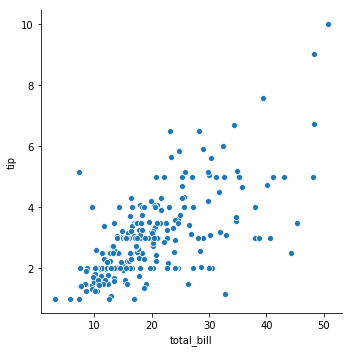

In [9]:
sns.relplot(x="total_bill", y="tip", data=tips); # scatterplot of total bill(x axis) against tip(y axis) from data in tips dataset

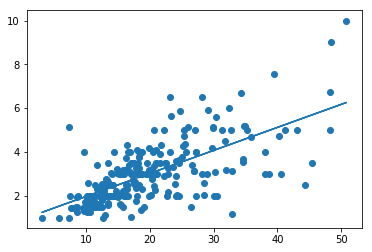

In [10]:
import numpy as np # import numpy package
import matplotlib.pyplot as plt # import pyplot package from matplotlib
b = tips["total_bill"] # return "total bill" column as array and assign to variable b
t = tips["tip"] # return "tips" column as array and assign to variable t
d = np.polyfit(b,t,1) # use polyfit function to return array containing values m and c to be used in line of best fit. Assign to variable d
m = d[0] # return first value from array "d" and assign to variable m
c = d[1] # return second value from array "d" and assign to variable c
plt.scatter(b, t) # scatterplot of total bill against tips
plt.plot(b,m*b +c) # plot line of best fit using values m and c obtained above

My initial impression on viewing the plot is that there is indeed a correlation between total bill and tip which may be linear in nature.

# 5. Analysis of Relationship between Variables

# 6. Conclusion